In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))])

#download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data', transform=transform, train=True, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and Load the testing data
testset = datasets.FashionMNIST('F_MNIST_data', transform=transform, train=False, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

tensor(7)


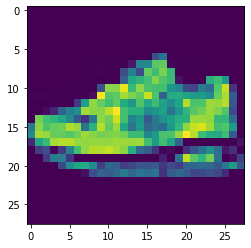

In [5]:
image, label = next(iter(trainloader))
plt.imshow(image[1, :].view(28,28))
print(label[1])

In [8]:
from torch import nn
import torch.nn.functional as F
from torch import optim

### Creating the network and initialising the optimizer and criterion

In [16]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1),
)

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

### training the network

In [18]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in (trainloader):
        
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        op = model(images)
        loss = criterion(op, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
    else:
        print(f'\n Training Loss: {running_loss/len(trainloader)}')


 Training Loss: 0.2766173779964447

 Training Loss: 0.2653046250343323

 Training Loss: 0.25170210003852844

 Training Loss: 0.2400909960269928

 Training Loss: 0.23051920533180237

 Training Loss: 0.21775275468826294

 Training Loss: 0.20954445004463196

 Training Loss: 0.2021832913160324

 Training Loss: 0.19431288540363312

 Training Loss: 0.18587137758731842


tensor([[3.1762e-11, 1.0000e+00, 3.7045e-15, 1.9384e-12, 1.7534e-19, 6.2402e-18,
         2.5836e-10, 1.8612e-23, 4.0287e-11, 4.0354e-17]],
       grad_fn=<ExpBackward>)


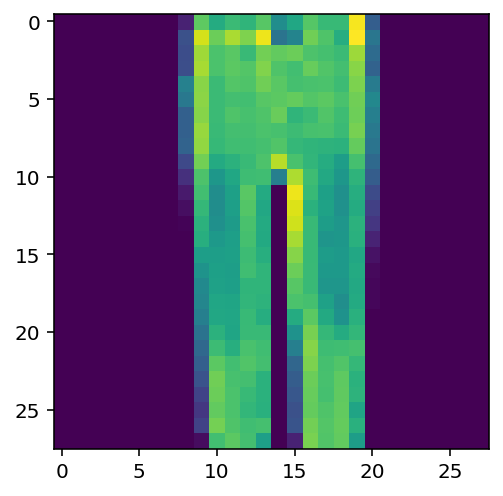

In [22]:
%config InlineBackend.figure_format = 'retina'

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0].view(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

plt.imshow(images[0].view(28,28))
print(ps)